In [3]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip



In [4]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 42



In [5]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True





In [6]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #split the data into training and test sets
import statsmodels.api as sm #to print report
from sklearn.model_selection import cross_val_score
%matplotlib inline

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

In [7]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('/Users/honpro/3. housing/boston.csv')




In [8]:
boston_input.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

EDA with original data

In [10]:
#boston_scaled =pd.DataFrame(scaler.fit_transform(boston), columns = boston.columns)

In [11]:
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


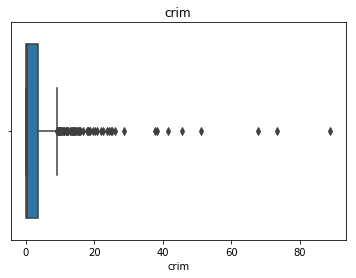

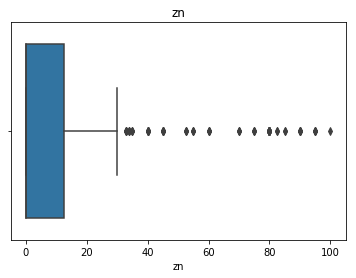

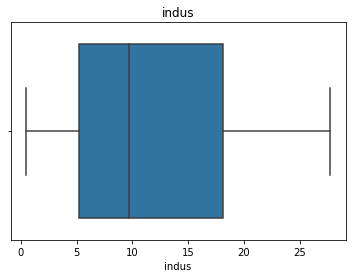

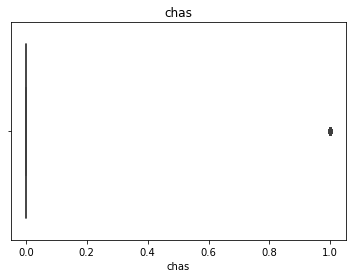

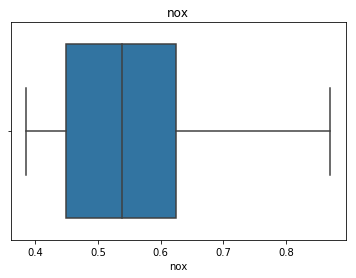

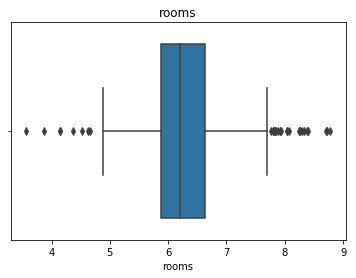

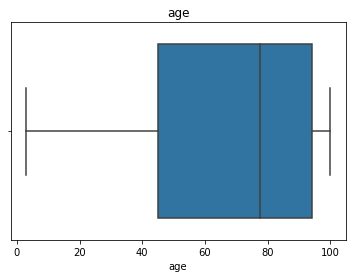

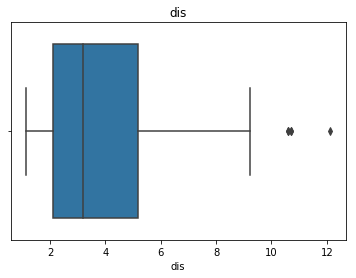

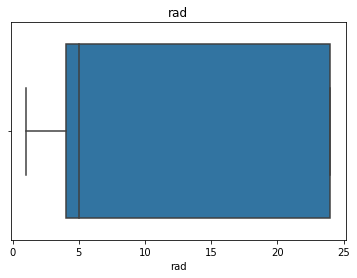

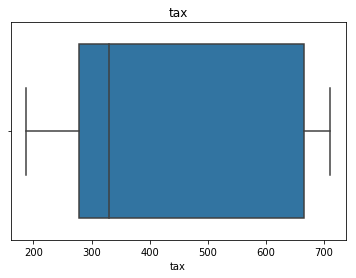

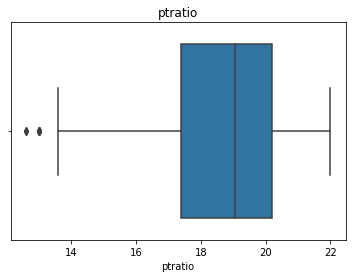

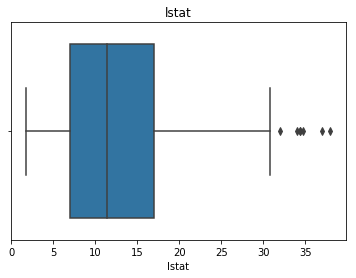

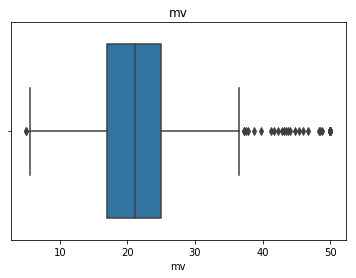

In [12]:
for i in range(13):
    plt.figure()
    plot_title = boston.columns[i]
    plt.title(plot_title)
    sns.boxplot(boston[boston.columns[i]], data=boston)
plt.show()



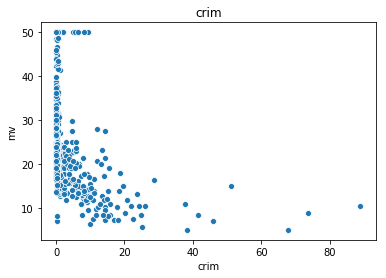

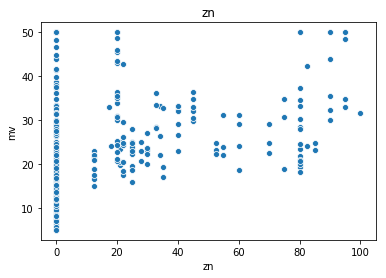

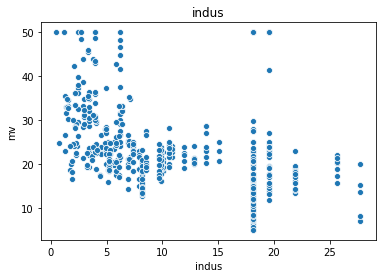

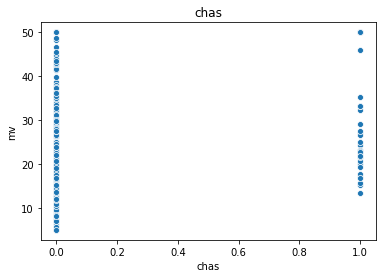

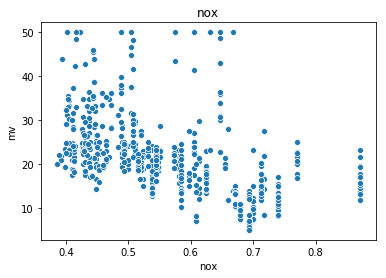

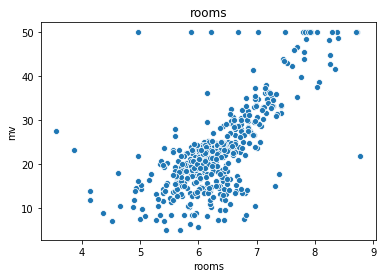

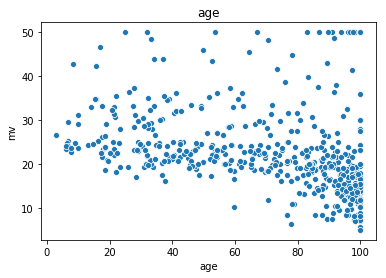

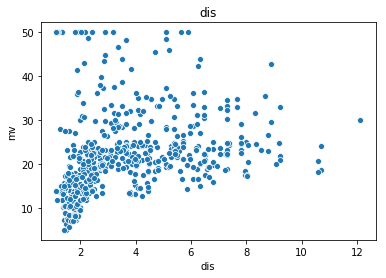

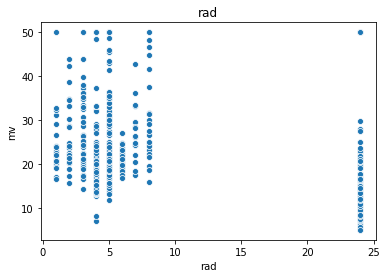

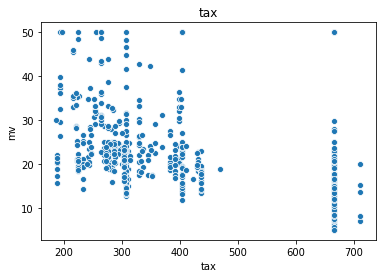

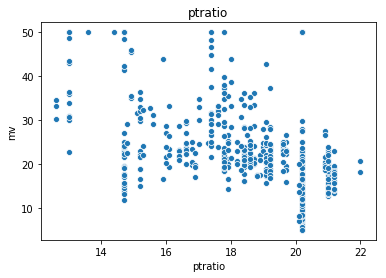

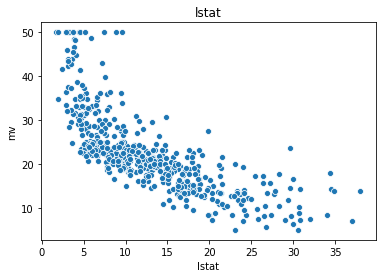

In [13]:
for i in range(12):
    plt.figure()
    plot_title = boston.columns[i]
    plt.title(plot_title)
    sns.scatterplot(x=boston[boston.columns[i]], y='mv', data=boston)
plt.show()


In [14]:
#Seperate IV and DV
#X = boston.drop('mv', axis=1)
#y = boston['mv']

#X=model_data[:,1:12]
#y=model_data[:,0]




In [15]:
#Train Test Split
#X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = RANDOM_SEED)




Linear Regression

In [16]:
#Model intercept and coefficient
#print('Intercept for model: {}'.format(lr.intercept_))
#print('Coeffecients for model: {}'.format(lr.coef_))

In [17]:
#lr = LinearRegression()

In [18]:
#lr.fit(X_train,y_train)

In [19]:
#Stat summary
#model = sm.OLS(y,X)
#result=model.fit()
#print(result.summary())

In [20]:
#Ridge regression
#ridge = Ridge(alpha = 1, solver = 'cholesky')
#print(ridge.fit(X_train,y_train))
#print(ridge.score(X_train,y_train))
#print(ridge.score(X_test,y_test))



In [21]:
#Lasso regression
#lasso = Lasso(alpha = .1)
#print(lasso.fit(X_train,y_train))
#print(lasso.score(X_train,y_train))
#print(lasso.score(X_test,y_test))

In [22]:
#Cross validation
#x=np.linspace(0,5,10)
#fig, axes = plt.subplots(2,2, figsize=(16,16))
#i=0
#j=0
#for i in range(2):
 #   for j in range(2):
  #      axes[i,j].plot(boston[boston.columns[i+1]],boston['mv'])
#axes[0,1].plot(x,x**2)
#axes[1,0].plot(x,x**2)
#axes[1,1].plot(x,x**2)
#plt.show()

# TEST

In [939]:
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet']
#Create all instances of regressors
names
regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT, normalize=False),
              Ridge(alpha = 167.8, solver = 'cholesky', fit_intercept = SET_FIT_INTERCEPT, normalize=False),
              ElasticNet(alpha=.1, l1_ratio = .5),
              Lasso(alpha = .0101, fit_intercept = SET_FIT_INTERCEPT, random_state = RANDOM_SEED)]

In [940]:
#Kfold validation
from sklearn.model_selection import KFold
N_FOLDS = 10
cv_results = np.zeros((N_FOLDS,len(names)))
print(cv_results)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [941]:
kf = KFold(n_splits = 10, shuffle = False, random_state = RANDOM_SEED)




In [942]:
index_for_fold = 0
index_for_method = 0

In [943]:
index_for_fold = 0
for train_index, test_index in kf.split(model_data):
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]
    
    
    index_for_method = 0
    for name, reg_model in zip(names, regressors):
        print("\nfold number {} and method {}".format(index_for_fold,index_for_method))
        print('\nregression model evaluation for:', name)
        print(' Scikit learn method',reg_model)
        reg_model.fit(X_train, y_train)
        print('\nFitted Regression intercept',reg_model.intercept_)
        print('\Fitted Response coeffecient',reg_model.coef_)
    
        y_test_predict = reg_model.predict(X_test)
        print('\nR-squared', r2_score(y_test,y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('\nRMSE',fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method +=1

    index_for_fold = index_for_fold +1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names



fold number 0 and method 0

regression model evaluation for: Linear_Regression
 Scikit learn method LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Fitted Regression intercept -0.005032049293645764
\Fitted Response coeffecient [-0.11088775  0.13573238  0.01408652  0.0787664  -0.23758124  0.26794267
  0.0065031  -0.37082275  0.27035218 -0.23150162 -0.21456859 -0.45500336]

R-squared 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

RMSE 0.3080338355432656

fold number 0 and method 1

regression model evaluation for: Ridge_Regression
 Scikit learn method Ridge(alpha=167.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

Fitted Regression intercept 0.014599898884189118
\Fitted Response coeffecient [-0.07693805  0.04994448 -0.06019971  0.07923159 -0.08632626  0.27827731
 -0.00629946 -0.13538609  0.02704661 -0.07191987 -0.15762171 -0.

In [946]:
cv_results_df


,Linear_Regression,Ridge_Regression,Lasso_Regression,ElasticNet
0,0.308034,0.324087,0.300472,0.297237
1,0.414889,0.351161,0.336669,0.392574
2,0.438938,0.284613,0.321841,0.400885
3,0.652244,0.786447,0.778486,0.672493
4,0.621783,0.605789,0.580996,0.589789
5,0.496012,0.613720,0.636351,0.505453
6,0.343828,0.359932,0.398613,0.329914
7,1.340827,1.227724,1.322567,1.364875
8,0.669705,0.637552,0.707934,0.663571
9,0.333138,0.293552,0.300564,0.297806


In [948]:
print(cv_results_df['Linear_Regression'].mean())
print(cv_results_df['Ridge_Regression'].mean())
print(cv_results_df['Lasso_Regression'].mean())
print(cv_results_df['ElasticNet'].mean())

0.5619397427745954
0.5484576252505431
0.5684491220215488
0.5514596190048139


In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.738145372476744
0.47795735726099703


In [33]:
print(lr.coef_)
print(lr.intercept_)

[-0.10727116  0.13089117  0.01341125  0.07572248 -0.22610109  0.27982983
  0.04153967 -0.33550252  0.3262372  -0.30856213 -0.2064141  -0.45214428]
-0.004165299014140228


In [34]:
ridge = Ridge(alpha = 167)


In [35]:
ridge.fit(X_train,y_train)

Ridge(alpha=167, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6984332622175082
0.5946508319541426


In [37]:
lasso = Lasso(alpha = .0101)

In [38]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.0101, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
lasso.coef_

array([-0.07855403,  0.09327381, -0.        ,  0.0753827 , -0.17154837,
        0.30267065,  0.        , -0.29073297,  0.13414644, -0.14458946,
       -0.18767582, -0.4337843 ])

In [40]:
lasso.score(X_test,y_test)

0.5828194502756073

In [41]:
kf

KFold(n_splits=10, random_state=42, shuffle=False)

In [42]:
kf.split(model_data)

<generator object _BaseKFold.split at 0x1c241dfcf0>